**Tìm hiểu các mối quan hệ**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('COVID_4-19.csv')
data.head()

,Country,Total Cases,New Cases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Serious,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Continent
0,USA,32476153,51653.0,581573,498.0,25043463,6851117,9815.0,97655.0,1749.0,430886619.0,1295672.0,332558517,North America
1,India,15314714,256947.0,180550,1757.0,13103220,2030944,8944.0,11011.0,130.0,267894549.0,192610.0,1390864355,Asia
2,Brazil,13977713,34642.0,375049,1607.0,12460712,1141952,8318.0,65387.0,1754.0,28600000.0,133789.0,213770046,South America
3,France,5296822,7296.0,101222,489.0,4151289,1044311,5970.0,81004.0,1548.0,72613536.0,1110478.0,65389433,Europe
4,Russia,4710690,8589.0,105928,346.0,4333598,271164,2300.0,32268.0,726.0,126000000.0,863104.0,145984714,Europe


In [3]:
data.dtypes

Country              object
Total Cases           int64
New Cases           float64
TotalDeaths          object
NewDeaths           float64
TotalRecovered        int64
ActiveCases           int64
Serious             float64
Tot Cases/1M pop    float64
Deaths/1M pop       float64
Total Tests         float64
Tests/1M pop        float64
Population           object
Continent            object
dtype: object

---
bỏ dòng *MS Zaandam* với *Diamond Princess*

Replace = 0 tất cả ô thiếu

Chuyển total death, Populrtion sang int64




In [4]:
data_ele = data.loc[(data["Country"] == 'MS Zaandam') | (data["Country"] == 'Diamond Princess')]
data = data.drop(data.index[list(data_ele.index)])
data = data.replace(r'^\s*$', 0, regex=True)
data['TotalDeaths'] = data['TotalDeaths'].astype('int64')

In [5]:
data['Population'] = data['Population'].astype('int64')

In [6]:
data.dtypes

Country              object
Total Cases           int64
New Cases           float64
TotalDeaths           int64
NewDeaths           float64
TotalRecovered        int64
ActiveCases           int64
Serious             float64
Tot Cases/1M pop    float64
Deaths/1M pop       float64
Total Tests         float64
Tests/1M pop        float64
Population            int64
Continent            object
dtype: object

In [7]:
data1 = data[['Country','Total Cases','TotalDeaths']]


In [8]:
data1.head()

,Country,Total Cases,TotalDeaths
0,USA,32476153,581573
1,India,15314714,180550
2,Brazil,13977713,375049
3,France,5296822,101222
4,Russia,4710690,105928


<ipython-input-9-502278918aa2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top15_deaths.sort_values(by = 'TotalDeaths', ascending = False,ignore_index=True, inplace = True)


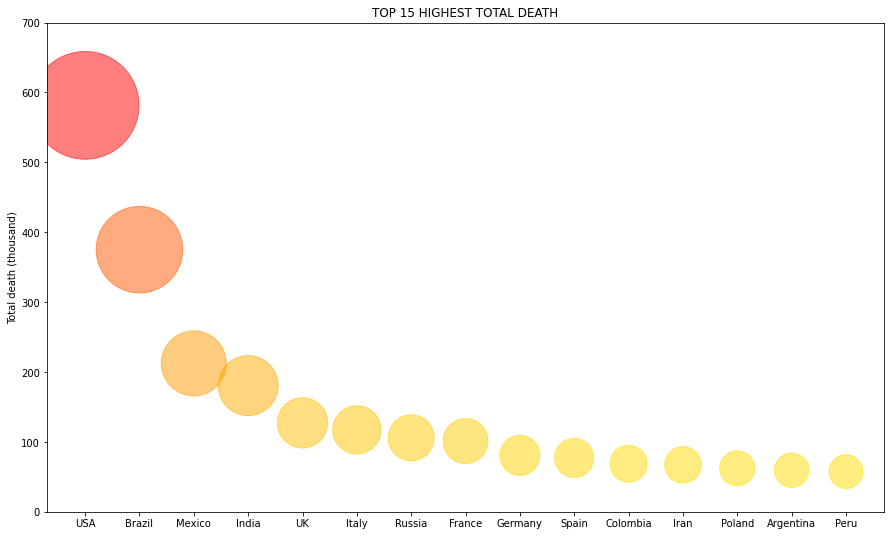

In [9]:
top15_deaths = data1[['Country','TotalDeaths']]
top15_deaths.sort_values(by = 'TotalDeaths', ascending = False,ignore_index=True, inplace = True)
top15_deaths = top15_deaths.head(15)

names = top15_deaths['Country']
values = top15_deaths['TotalDeaths']

color = []
s = 0
for i in range(len(names)-1):
        color.append((1,s/600000,0))
        s += (values[i] - values[i+1])
color.append((1,s/600000,0))
plt.figure(figsize=(15, 9))
plt.ylim([0,700])
plt.scatter( x = names, y = values/1000,
             s = values/50, c = color, alpha=0.5)
plt.ylabel('Total death (thousand)' )
plt.title('TOP 15 HIGHEST TOTAL DEATH')
plt.show()

<BarContainer object of 15 artists>

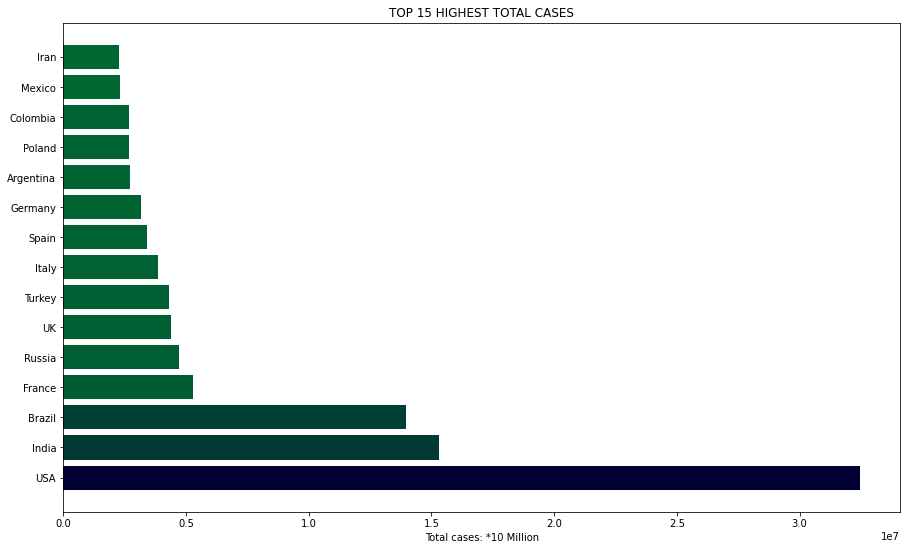

In [10]:
top15_case = data[['Country','Total Cases']]

top15_case = top15_case.head(15)

names = top15_case['Country']
values = top15_case['Total Cases']

c = []
s = 0
for i in range(len(names)-1):
        c.append((0,s/75_000_000,0.2))
        s += (values[i] - values[i+1])
c.append((0,s/75_000_000,0.2))

c
plt.figure(figsize=(15, 9))

plt.title('TOP 15 HIGHEST TOTAL CASES')
plt.xlabel('Total cases: *10 Million')

plt.barh(names, values,color = c)

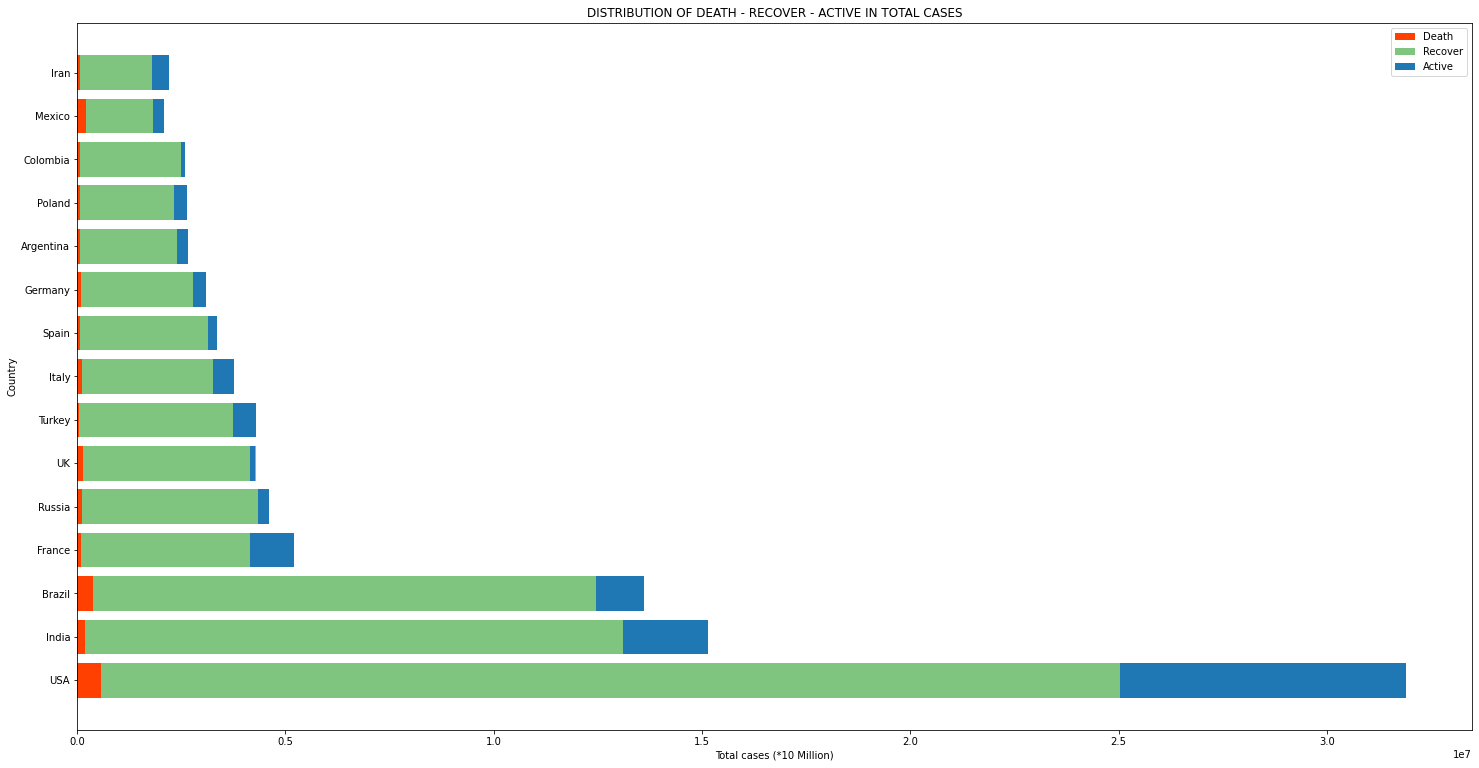

In [11]:
top15_distribute = data[['Country','TotalDeaths','TotalRecovered','ActiveCases']].head(15)


labels = top15_distribute['Country']
death = top15_distribute['TotalDeaths']
recover = top15_distribute['TotalRecovered']
active = top15_distribute['ActiveCases']

       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(25,13))

ax.barh(labels, death , label='Death',color = (1,0.25,0))
ax.barh(labels, recover, left = death,label='Recover',color = (0,0.55,0),alpha = 0.5)
ax.barh(labels, active,  left = recover,label='Active')

ax.set_ylabel('Country')
ax.set_xlabel('Total cases (*10 Million)')
ax.set_title('DISTRIBUTION OF DEATH - RECOVER - ACTIVE IN TOTAL CASES')
ax.legend()

plt.show()

---
Mối quan hệ giữa số cases và số chết: có thế có đường thằng tuyến tính

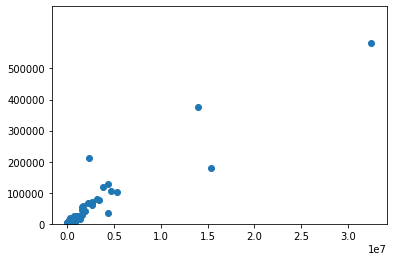

In [12]:
x = data1['Total Cases']
y = data1['TotalDeaths']


plt.ylim([0, 700000])
plt.yticks(np.arange(min(y), max(y)+1, 100000))
plt.scatter(x,y)
plt.show()

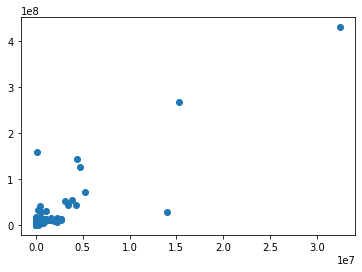

In [13]:
x = data['Total Cases']
y = data['Total Tests']

plt.scatter(x,y)
plt.show()

In [14]:
continent_data = data.groupby(by = 'Continent').sum()
continent_data

,Total Cases,New Cases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Serious,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
Continent,,,,,,,,,,,,
Africa,4478163,8927.0,118501,234.0,3996320,363342,3776.0,422743.0,6750.8,42971859.0,4185245.0,1366127240
Asia,34204503,400161.0,470857,3295.0,29740820,3992826,29611.0,1106331.0,10906.9,727097321.0,25980954.0,4636590526
Australia/Oceania,61466,260.0,1175,2.0,34790,25501,4.0,109228.0,1003.0,18545555.0,2283559.0,42691595
Europe,42967972,99538.0,978619,2827.0,37332669,4656684,32666.0,3283840.0,62474.0,708579796.0,61874902.0,747993083
North America,37506600,67278.0,847593,708.0,29188674,7470333,17193.0,1092296.0,14854.0,479988831.0,23165738.0,592803946
South America,23491992,85708.0,626273,2852.0,21120280,1745439,24924.0,529850.0,11860.0,84287132.0,5382878.0,433604585


In [15]:
test_1M_percentage = (continent_data['Tests/1M pop']/sum(continent_data['Tests/1M pop'])*100).round(2)
test_1M_percentage                      

Continent
Africa                3.41
Asia                 21.14
Australia/Oceania     1.86
Europe               50.36
North America        18.85
South America         4.38
Name: Tests/1M pop, dtype: float64

In [16]:
continent_data.index

Index(['Africa', 'Asia', 'Australia/Oceania', 'Europe', 'North America',
       'South America'],
      dtype='object', name='Continent')

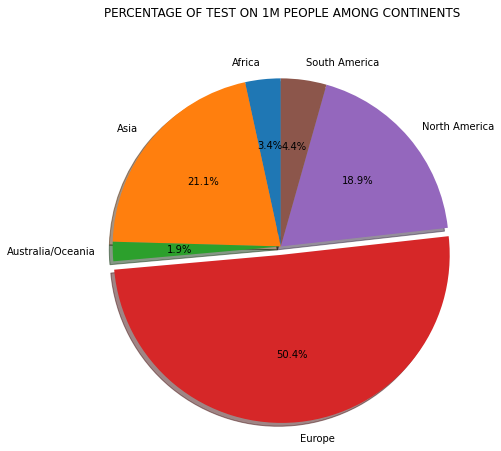

In [17]:
labels = list(continent_data.index)
sizes = list(test_1M_percentage)
explode = (0,0,0,0.05,0,0)
plt.figure(figsize = (7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',explode = explode,
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("PERCENTAGE OF TEST ON 1M PEOPLE AMONG CONTINENTS", y = 1.1)
plt.show()

In [18]:
positive = (continent_data['Total Cases']/continent_data['Total Tests']*100).round(2)
negative = ((continent_data['Total Tests'] - continent_data['Total Cases']) / continent_data['Total Tests']*100).round(2)
negative_positive = pd.DataFrame({
                                  'Pos':positive,
                                  'Nega':negative})

Text(0.5, 0.98, 'Continent-Wise Tested Positive & Negative Percentage Composition')

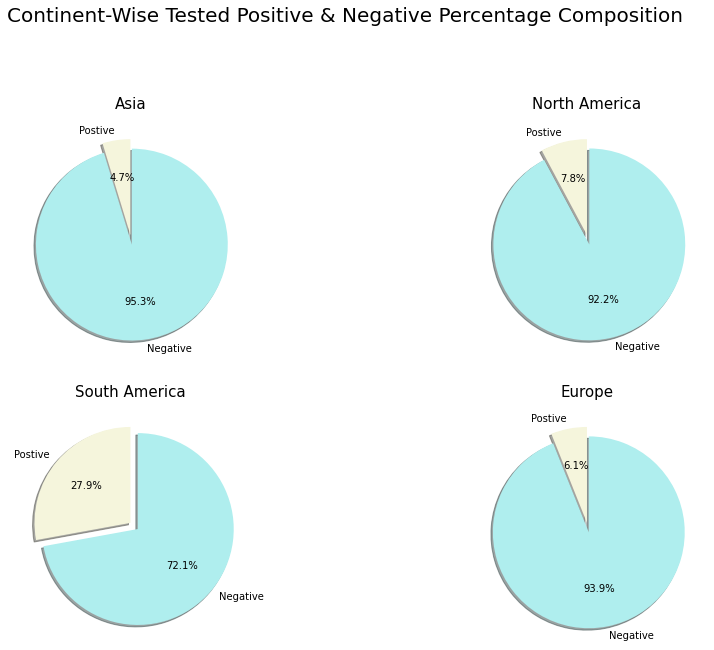

In [19]:
explode = (0,0.1)
labels = ['Postive','Negative']
colors = ['beige','paleturquoise']

fig = plt.figure(figsize = (15,15))

plt.subplot(321)
plt.pie(negative_positive[negative_positive.index == 'Asia'].values.tolist()[0],labels = labels, explode = explode, autopct = '%.1f%%', 
        startangle = 90, colors = colors, shadow = True)
plt.title('Asia', fontsize = 15)


plt.subplot(322)
plt.pie(negative_positive[negative_positive.index == 'North America'].values.tolist()[0],labels = labels, explode = explode, autopct = '%.1f%%', 
        startangle = 90, colors = colors, shadow = True)
plt.title('North America', fontsize = 15)

plt.subplot(323)
plt.pie(negative_positive[negative_positive.index == 'South America'].values.tolist()[0],labels = labels, explode = explode, autopct = '%.1f%%', 
        startangle = 90, colors = colors, shadow = True)
plt.title('South America', fontsize = 15)

plt.subplot(324)
plt.pie(negative_positive[negative_positive.index == 'Europe'].values.tolist()[0],labels = labels, explode = explode, autopct = '%.1f%%', 
        startangle = 90, colors = colors, shadow = True)
plt.title('Europe', fontsize = 15)

plt.suptitle('Continent-Wise Tested Positive & Negative Percentage Composition', fontsize = 20)

---
Mối quan hệ giữa số cases và số test: có thế có đường thằng tuyến tính